# BENGALURU HOUSING PRICES PREDICTION#

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20 , 10)

  <b>=====================  DATA ANALYSIS AND CLEANING  ====================== </b>

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#Dropping columns with majority of NULL values or/and less relevant categorical data
df2 = df1.drop(columns = ['society' , 'balcony', 'availability' , 'area_type'])

In [7]:
df3 = df2.dropna()

In [8]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# Remove ambiguity between BHK and bedroom terms in the size column by creating a new column all together
def getBedrooms(s):
    return int(s.split(" ")[0])

df3['BHK'] = df3['size'].apply(getBedrooms)

/home/nitish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13246 non-null object
bath          13246 non-null float64
price         13246 non-null float64
BHK           13246 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def isFloat(n):
    try:
        float(n)
    except:
        return False
    return True

In [14]:
# Print the rows with rows that cannot be converted to Float
df3[~df3["total_sqft"].apply(isFloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
# Cleaning data from total_sqft column:-
# Remove values not in square ft.
# Replace values with their average (eg 1100 - 1110 becomes 1105)

def convert_sqft_to_float(s):
    tokens = s.split("-")
    if(len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(s)
    except:
        return None
    

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_float)

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13200 non-null float64
bath          13246 non-null float64
price         13246 non-null float64
BHK           13246 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


<b> ======================== FEATURE ENGINEERING ==================== </b>

In [18]:
df5 = df4.copy()
df5['prices_per_sqft'] = (df4['price']/df4['total_sqft']) * 100000 # because price is in lacs

In [19]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,prices_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [20]:
df5['location'].nunique() # too many features to make dummiesb

1304

In [21]:
# Dealing with the location columns now

#Strip off extra spaces
df5['location'] = df5['location'].apply(lambda x :  x.strip()) 

In [22]:
#Observe the frequency of different locations
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
print(location_stats)

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [23]:
#Get the number of locations with less than 10 mentions
count = 0
for el in location_stats:
    if(el <= 10):
        count += 1
print(count)

1052


In [24]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [25]:
# We club the locations with less than or equal to 10 mentions/entries into a single class
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [26]:
df5['location'].value_counts()

other                        2881
Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
Thanisandra                   236
Yelahanka                     210
Uttarahalli                   186
Hebbal                        176
Marathahalli                  175
Raja Rajeshwari Nagar         171
Bannerghatta Road             152
Hennur Road                   150
7th Phase JP Nagar            149
Haralur Road                  141
Electronic City Phase II      131
Rajaji Nagar                  106
Chandapura                     98
Bellandur                      96
Hoodi                          88
KR Puram                       88
Electronics City Phase 1       87
Yeshwanthpur                   85
Begur Road                     84
Sarjapur                       81
Harlur                         79
Kasavanhalli                   79
Banashankari                   74
Hormavu                        74
Kengeri       

In [27]:
# Total number of unique classes reduced dramatically
df5.location.nunique()

242

 <b> ============================  OUTLIER DETECTION AND REMOVAL ================================== </b>

In [28]:
df5.head()

,location,size,total_sqft,bath,price,BHK,prices_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
# ASSUMPTION : Average sqft per room is 300 ( Threshold set for the model) ,  anything less is taken as an outlier
df6 = df5[~(df5['total_sqft'] / df5['BHK'] < 300)]

In [30]:
df6.head()

,location,size,total_sqft,bath,price,BHK,prices_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [31]:
df6['prices_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: prices_per_sqft, dtype: float64

In [37]:
# Removal of datapoints having prices_per_sqft lying outside the range of mean and 1 standard deviation.

def remove_prices_per_sqft(df):
    df_out = pd.DataFrame()
    df = df.groupby('location')
    for key , subdf in df:
        m = np.mean(subdf['prices_per_sqft'])
        st = np.std(subdf['prices_per_sqft'])
        reduced_df = subdf[(subdf['prices_per_sqft'] > (m-st)) & (subdf['prices_per_sqft'] <= (m+st)) ]
        df_out = pd.concat([df_out , reduced_df] , ignore_index= True)
    
    
    return df_out

In [38]:
df7 = remove_prices_per_sqft(df6)
df7.shape

(10241, 7)

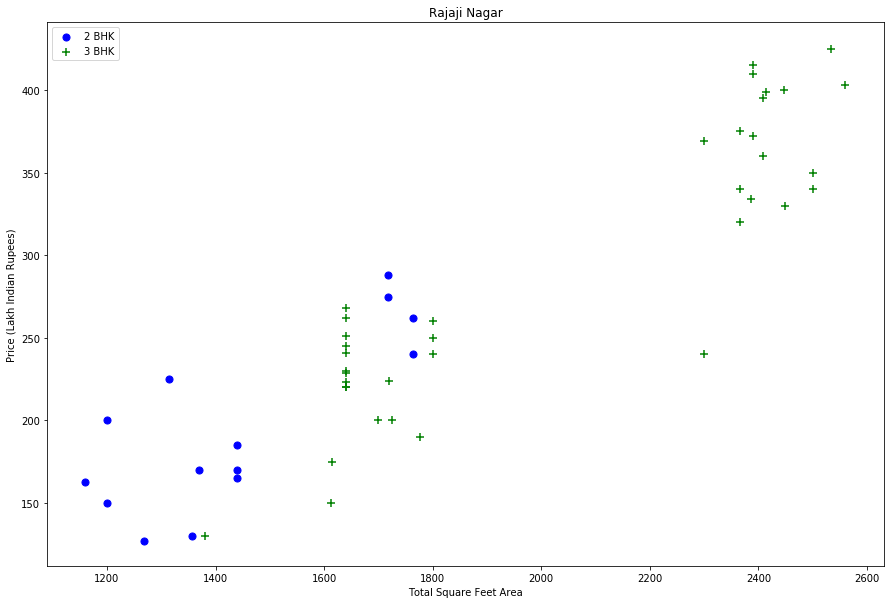

In [40]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location) & (df.BHK==2)]
    BHK3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [51]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
#by creating  a python dictionary storing the previous mean and stdev, and removing the rooms from 2 BHK having
#prices_per_sqft values less than these values (because logically this is highly unlikely)



def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.prices_per_sqft),
                'std': np.std(BHK_df.prices_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.prices_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df8 = remove_BHK_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

In [54]:
# Removing outliers from Bathroom columns
# If number of bathrooms > number of bedrooms + 2 , we remove it (because it is highly unlikely)

df9 = df8[df8['bath'] < df8['BHK']+2]
df9.shape


(7251, 7)

In [55]:
# Drop unnecessary features before modelling step
# Remove:-
# prices_per_sqft -> It was created only for Outlier detection
# size -> We already have a BHK column

df10 = df9.drop(columns = ['size' , 'prices_per_sqft'] , axis = 'columns')

<b> ========================================= MODEL TRAINING ================================ </b>

In [58]:
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11 = pd.concat([df10 , dummies]  ,axis = 'columns')

In [65]:
df12 = df11.drop(columns  = 'location') # Because location is a;ready encoded as dummies
df12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X = df12.drop(columns = 'price')
y = df12['price']

In [69]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , y_train)
lr_clf.score(X_test , y_test)

0.845227769787358

<b> ============  Use K Fold cross validation to measure accuracy of our LinearRegression model ======</b>

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82433489, 0.77166234, 0.85089567, 0.80836261, 0.83653286])

<b> ====================  Find best model using GridSearchCV ======================</b>

In [99]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818362,{'normalize': True}
1,lasso,0.699275,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.775293,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


 <b> Hence linear regression is the best Model for the given dataset </b>

In [102]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [103]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904676985433

In [105]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519395011017

<b> ====================  Export the model to pickle file ==================== </b>

In [106]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<b>===== Export location and column information to a file to be used later on in our prediction application ===== </b>

In [108]:
# We need to save the exact column structure so that it can be used for future predictions
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))